# Agenda, week 5: Visualization

1. How do we plot? Setting things up, and options
2. Line plots
3. Bar plots
4. Histograms
5. Pie plots
6. Scatter plots
7. Boxplots
8. What next?


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 100, [4, 5]),
              index=list('abcd'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,44,47,64,67,67
b,9,83,21,36,87
c,70,88,88,12,58
d,65,39,87,46,88


In [3]:
df.loc['b', 'x'] = np.nan

In [4]:
df.loc['b', 'y'] = np.nan

In [5]:
df.loc['c', 'v'] = np.nan

In [6]:
df.loc['d', 'v'] = np.nan
df.loc['a', 'z'] = np.nan

In [7]:
df

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [8]:
df.dropna()  # this removes any row with *any* NaN values

,v,w,x,y,z


In [9]:
df.dropna(thresh=2)  # drop any column that doesn't have two non-NaN values

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [11]:
df.dropna(thresh=4)  # drop any column that doesn't have four non-NaN values

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [14]:
# this gives me a boolean series, showing me non-NaN values in column 'v'
df['v'].notna()

a     True
b     True
c    False
d    False
Name: v, dtype: bool

In [15]:
# only show the rows in which 'v' doesn't have NaN
df.loc[df['v'].notna()]

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0


# Output from a groupby 



In [17]:
df['category'] = ['food', 'food', 'drink', 'drink']
df

,v,w,x,y,z,category
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [18]:
# for each distinct value of category
# show me the mean value of column 'z'

df.groupby('category')['z'].mean() # here, we get a series back 

category
drink    73.0
food     87.0
Name: z, dtype: float64

In [22]:
g_df = df.groupby('category')[['y', 'z']].mean() # here, we get a data frame back -- one column for x, one for y
g_df

,y,z
category,,
drink,29.0,73.0
food,67.0,87.0


In [23]:
g_df.index

Index(['drink', 'food'], dtype='object', name='category')

In [24]:
df

,v,w,x,y,z,category
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [25]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [26]:
df.index.name = 'surprise'

In [27]:
df

,v,w,x,y,z,category
surprise,,,,,,
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [20]:
# but does a groupby really give us a series or data frame?
# the answer depends on what you consider "groupby returning".

# if you go through the whole thing -- groupby(column)[other_columns].mean() -- then yes, we get
# a series or data frame

# but the return value from groupby is actually a special object

df.groupby('category')

# Visualization

Visualization is a critical part of data analysis, for several reasons:

1. If we have to present our results to non-mathematical types, they'll often appreciate having a visual aid, not just tables of numbers.
2. Guess what? Data analysts are humans, too, and understand visual data faster than mathematical tables, just like everyone else.
3. Because we analysts are humans, we can see a visual form and infer certain things from it, things that we might not notice or understand in a table of numbers. So it's also useful to visualize our data when we're analyzing it, to get a deeper understanding of relationships and values.
4. Often, our analysis will change, or benefit, after we've visualized the data in this way.

# Visualization toolkits and libraries

By far, the biggest and best known visualization library for data in Python is known as "matplotlib." Lots of people use it, because it's so flexible and so powerful.

However, I find it almost impossible to use and understand. 

Fortunately, Pandas comes with methods that invoke matplotlib for us, thus saving us from a lot of the problems associated with it. So we'll be doing visualization via Pandas, which will do the hard matplotlib work for us.

In [28]:
# start with plotting a series

np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
          index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<AxesSubplot: >

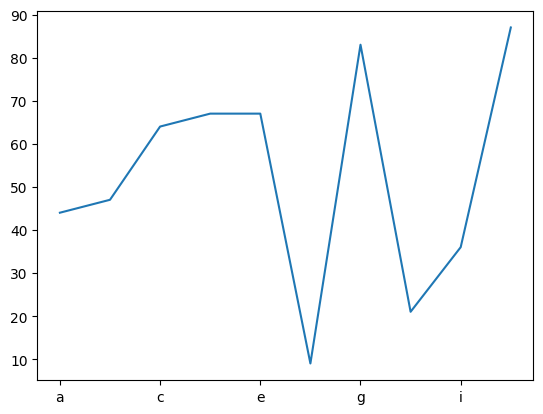

In [29]:
s.plot.line()    # plot is an attribute of our series, and also our gateway to using Matplotlib.

# we can call line() to create a line plot -- each of the values in our series will be plotted
# on the y axis, and the index will be used for the x axis.  